In [1]:
import sklearn
import numpy as np
import os
import warnings
warnings.filterwarnings(action="ignore", message="^interal gelsd")

In [2]:
import os
import pandas as pd

FILE_PATH = "C:/Users/Wuzz/Desktop/winequality-red.csv"

def load_wine_data(wine_path=FILE_PATH):
    csv_path = os.path.join(wine_path,"winequality-red.csv")
    return pd.read_csv(wine_path)

wines = load_wine_data()

#head displays the top 5 rows in the dataset
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


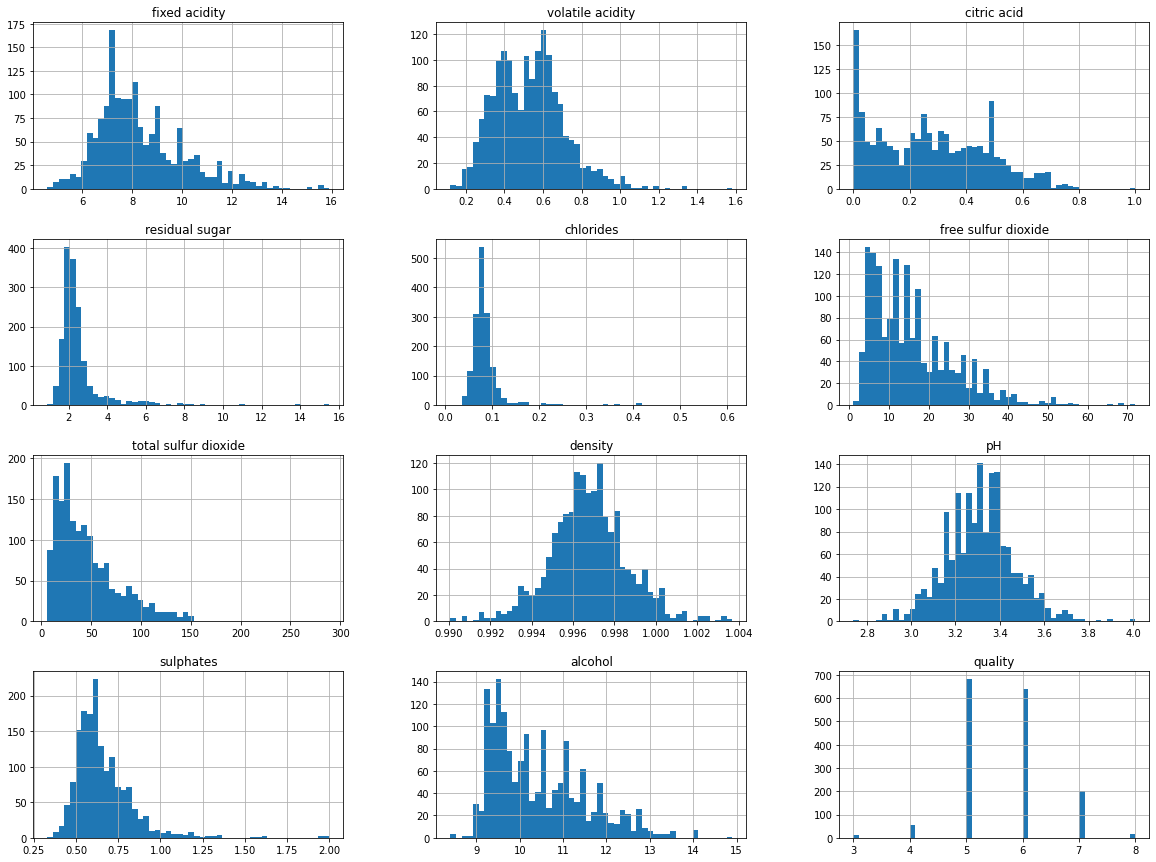

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
wines.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
corr_matrix = wines.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [7]:
wines = wines.drop(columns="pH")
#wines = wines.drop(columns="residual sugar")
#wines = wines.drop(columns="free sulfur dioxide")

In [8]:
corr_matrix = wines.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [9]:
#split dataset for training and testing. Ensure it is split the same way each time with the _state
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wines, test_size=0.2, random_state=1337)

In [10]:
#seperate the target column from the training set
wines_predicator = train_set.drop(columns="quality")
wines_label = train_set["quality"].copy()

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
wines_num_scaled = scaler.fit_transform(wines_predicator)
wines_num_scaled

array([[0.17699115, 0.2739726 , 0.04      , ..., 0.40602056, 0.17964072,
        0.15384615],
       [0.43362832, 0.23287671, 0.49      , ..., 0.64096916, 0.23952096,
        0.4       ],
       [0.53097345, 0.20547945, 0.48      , ..., 0.52349486, 0.32335329,
        0.44615385],
       ...,
       [0.2300885 , 0.34246575, 0.06      , ..., 0.54258443, 0.1257485 ,
        0.16923077],
       [0.2920354 , 0.25342466, 0.32      , ..., 0.49412628, 0.13173653,
        0.16923077],
       [0.16814159, 0.33561644, 0.        , ..., 0.39207048, 0.22155689,
        0.47692308]])

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=1337, max_depth=10)
tree_reg.fit(wines_num_scaled, wines_label)

DecisionTreeRegressor(max_depth=10, random_state=1337)

In [13]:
from sklearn.metrics import mean_squared_error

wines_predictions = tree_reg.predict(wines_num_scaled)
tree_mse = mean_squared_error(wines_label, wines_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.3637572132938134

In [14]:
from sklearn.metrics import mean_absolute_error

tree_mae = mean_absolute_error (wines_label, wines_predictions)
tree_mae

0.2205312176798301

In [15]:
X_test = test_set.drop("quality", axis=1)
y_test = test_set["quality"].copy()

X_test_prepared = scaler.fit_transform(X_test)

In [16]:
tree_reg_predictions = tree_reg.predict(X_test_prepared)
tree_reg_mse = mean_squared_error(y_test, tree_reg_predictions)
tree_reg_rmse = np.sqrt(tree_reg_mse)
tree_reg_rmse

0.8926536627334639